https://d2l.ai/chapter_preliminaries/probability.html

In [11]:
%matplotlib inline
import random
import torch
from torch.distributions.multinomial import Multinomial
from d2l import torch as d2l

In [12]:
num_tosses = 5000000
heads = sum([random.random() > 0.5 for _ in range(num_tosses)])
tails = num_tosses - heads
print("heads, tails (%): ", [heads/num_tosses, tails/num_tosses])

heads, tails (%):  [0.499921, 0.500079]


In [28]:
fair_probs = torch.tensor([0.5, 0.5])
N = 10000 # number of samples

In [23]:
Multinomial(N, fair_probs).sample() / N

tensor([0.5001, 0.4999])

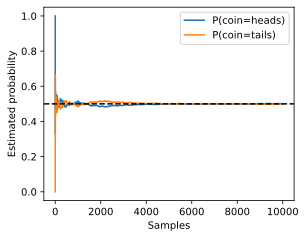

In [30]:
counts = Multinomial(1, fair_probs).sample((N,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)
estimates = estimates.numpy()

d2l.set_figsize((4.5, 3.5))
d2l.plt.plot(estimates[:, 0], label=("P(coin=heads)"))
d2l.plt.plot(estimates[:, 1], label=("P(coin=tails)"))
d2l.plt.axhline(y=0.5, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Samples')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();